# Swimmer Plots

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import json
from algorithms.samplers import *
from envs import *
from policies import *
from data_processors import *
from tqdm import tqdm

In [2]:
policy_type = "nn"

## PGPE Results

In [42]:
# File Open
# linear policy
if policy_type != "nn":
    path = [
        "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_linear_policy_16_var_001",
        "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_linear_policy_16_var_01",
        "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_linear_policy_16_var_1",
        "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_linear_policy_16_var_10",
        "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_linear_policy_16_var_100"
    ]
else:
    # nn policy
    path = [
        # "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_nn_policy_50_var_001",
        # "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_nn_policy_50_var_01",
        # "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_nn_policy_50_var_1",
        # "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_nn_policy_50_var_10",
        # "/Users/ale/results/pgpe/pgpe_test_500_adam_01_swimmer_200_nn_policy_50_var_100",
        "/Users/ale/results/pgpe/pgpe_test_1000_adam_01_swimmer_200_nn_policy_tanh_80_var_1",
    ]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/pgpe_results.json"
    file = open(name)
    data.append(json.load(file))

In [43]:
print(list(data[0].keys()))

['performance_rho', 'performance_thetas_per_rho', 'best_theta', 'best_rho', 'thetas_history', 'rho_history']


<Figure size 640x480 with 0 Axes>

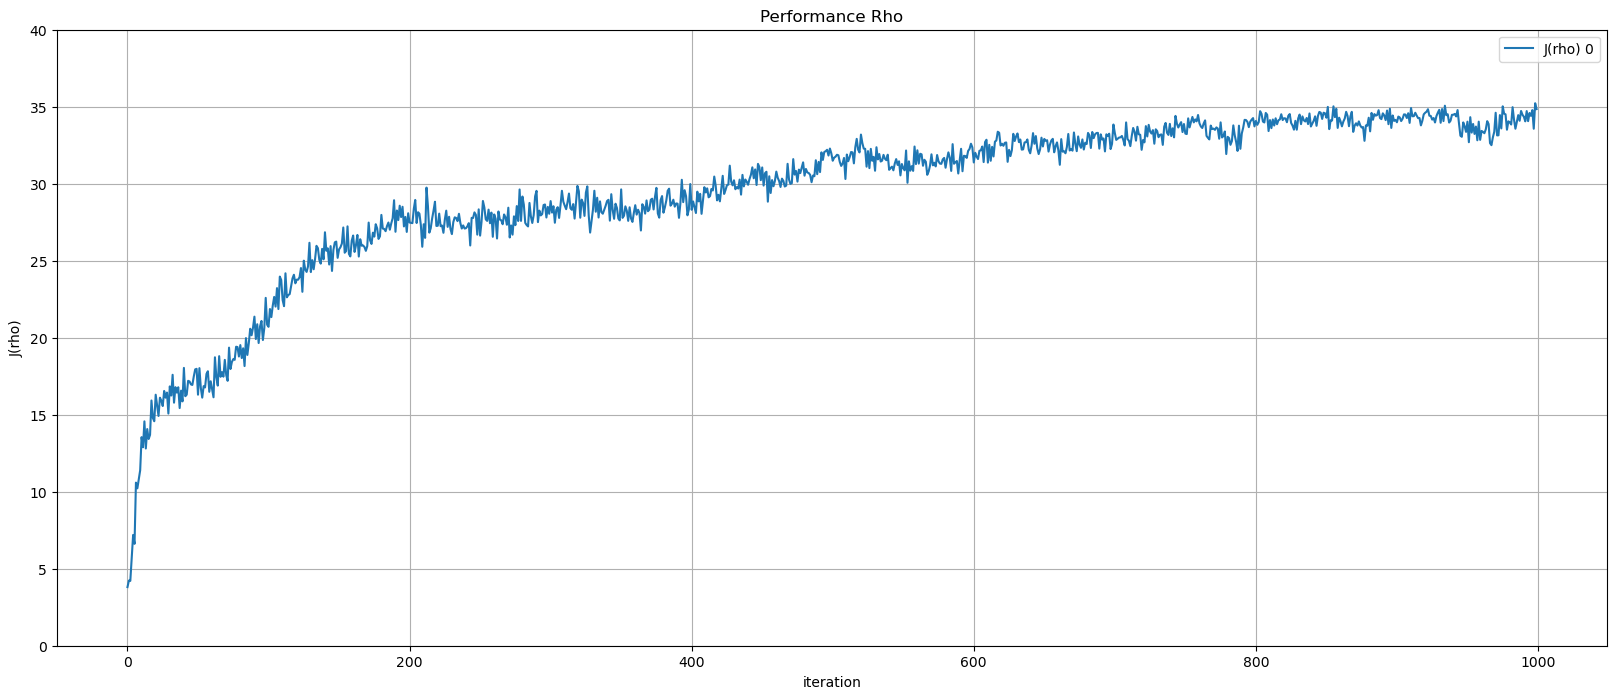

In [44]:
plt.clf()
plt.figure(figsize=(20, 8))
for i, d in enumerate(data):
    perf_rho = np.array(d["performance_rho"])
    perf_thetas = np.array(d["performance_thetas_per_rho"])
    best_theta = np.array(d["best_theta"])
    best_rho = np.array(d["best_rho"])
    thetas_history = np.array(d["thetas_history"])
    rho_history = np.array(d["rho_history"])
    
    dim = len(best_rho[0])
    ite = len(perf_rho)
    x = np.arange(ite)
    
    plt.plot(x, perf_rho, label=f"J(rho) {i}")
plt.title("Performance Rho")
plt.xlabel("iteration")
plt.ylabel("J(rho)")
plt.grid()
plt.ylim(0, 40)
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 0 Axes>

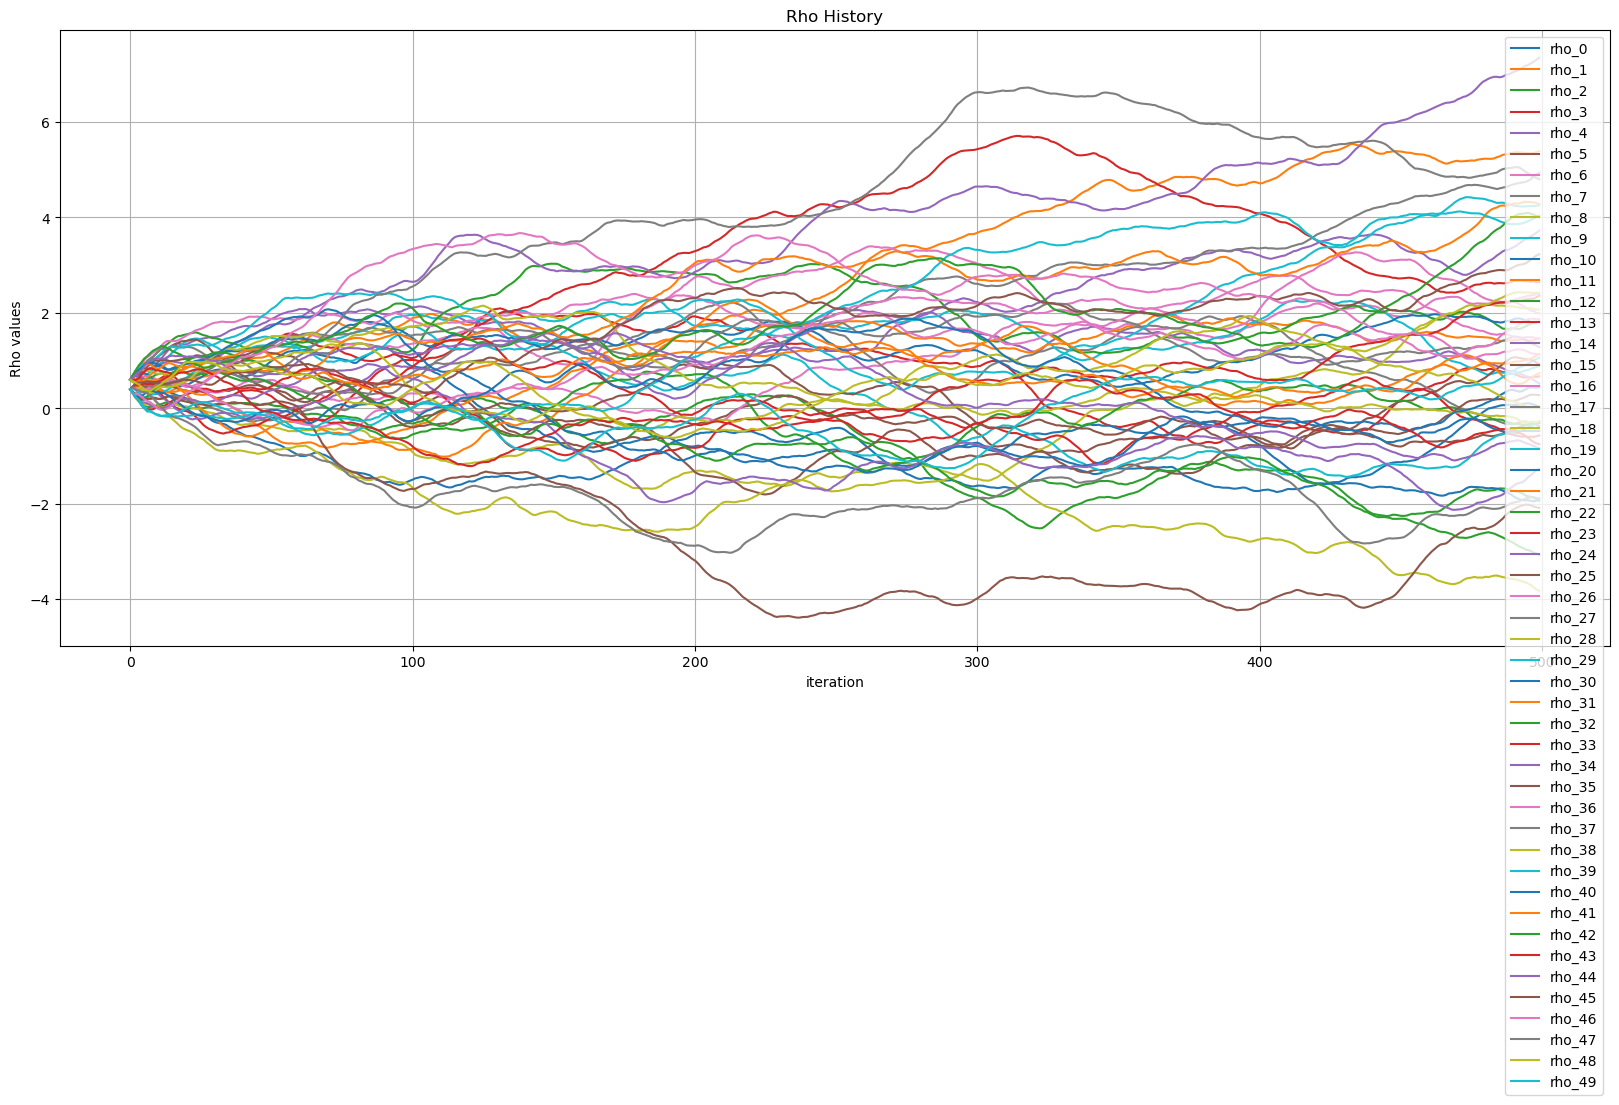

In [6]:
idx = 0
perf_rho = np.array(data[idx]["performance_rho"])
best_rho = np.array(data[idx]["best_rho"])
rho_history = np.array(data[idx]["rho_history"])
dim = len(best_rho[0])
ite = len(perf_rho)
x = np.arange(ite)

plt.clf()
plt.figure(figsize=(20, 8))
for i in range(dim):
    plt.plot(x, rho_history[:, i], label=f"rho_{i}")
plt.title("Rho History")
plt.xlabel("iteration")
plt.ylabel("Rho values")
plt.grid()
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 0 Axes>

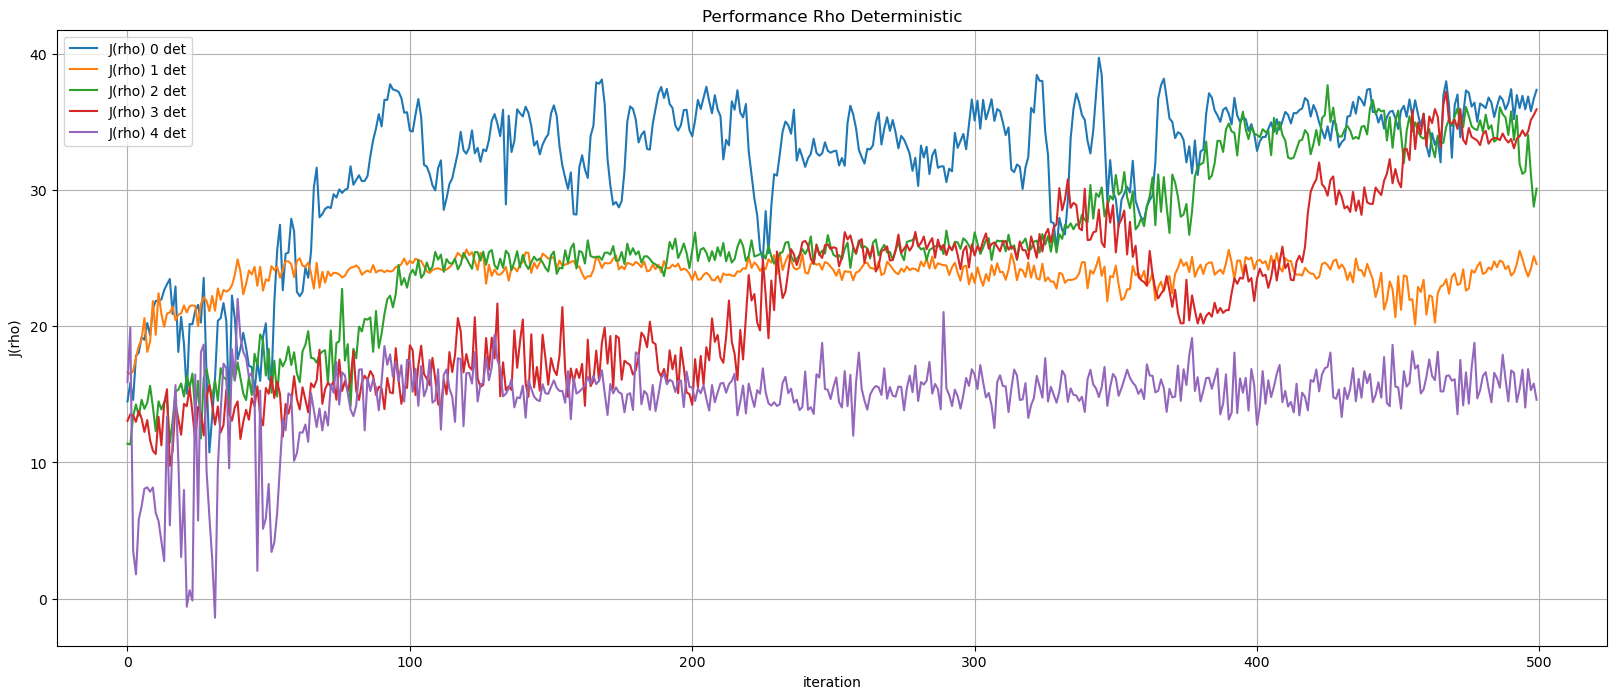

In [7]:
plt.clf()
plt.figure(figsize=(20, 8))
for i, d in enumerate(data):
    perf_rho = np.array(d["performance_rho"])
    perf_thetas = np.array(d["performance_thetas_per_rho"])
    best_theta = np.array(d["best_theta"])
    best_rho = np.array(d["best_rho"])
    thetas_history = np.array(d["thetas_history"])
    rho_history = np.array(d["rho_history"])
    det_res = np.array(d["performance_det"])
    
    dim = len(best_rho[0])
    ite = len(perf_rho)
    x = np.arange(ite)
    
    plt.plot(x, det_res, label=f"J(rho) {i} det")
plt.title("Performance Rho Deterministic")
plt.xlabel("iteration")
plt.ylabel("J(rho)")
plt.grid()
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 0 Axes>

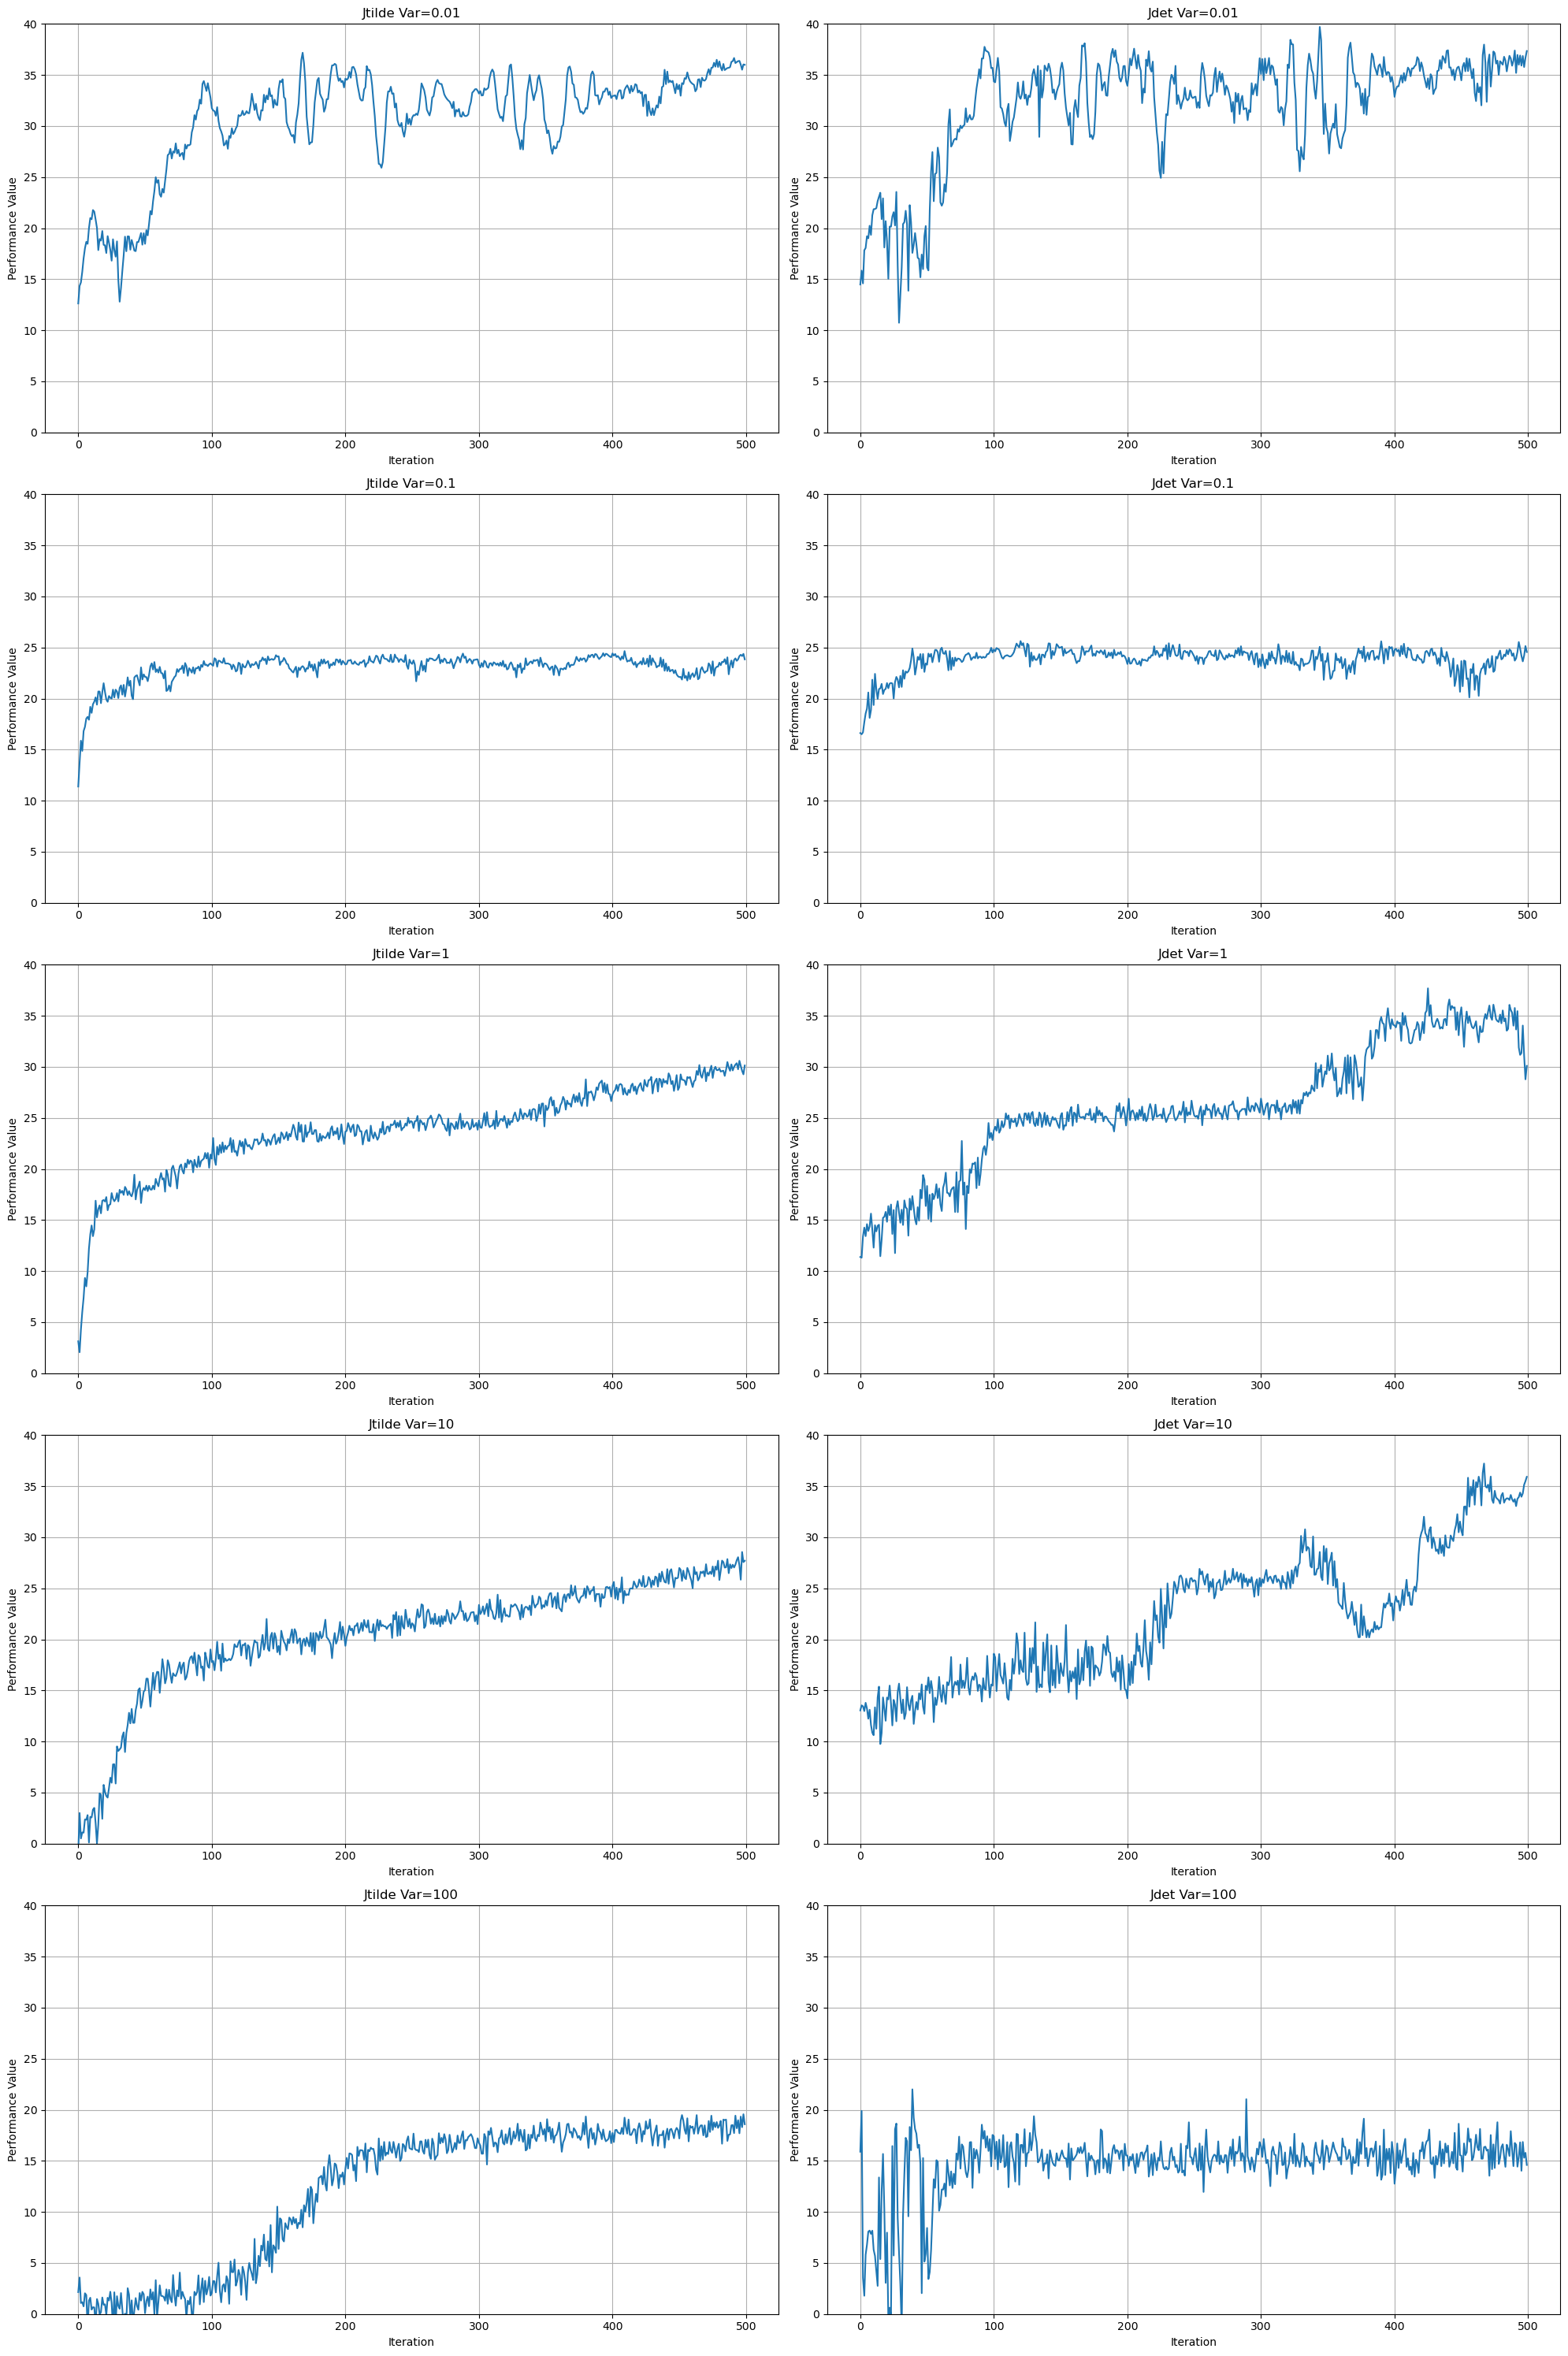

In [8]:
plt.clf()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
x = np.arange(500)
curves = []
labels = []
for i, d in enumerate(data):
    curves.append(np.array(d["performance_rho"]))
    curves.append(np.array(d["performance_det"]))
    labels.append("Jtilde " + lab[i])
    labels.append("Jdet " + lab[i])
    
for i, ax in enumerate(axs.flat):
    ax.plot(x, curves[i])
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Performance Value")
    ax.set_title(labels[i])
    ax.set_ylim(0, 40)
    ax.grid()
plt.tight_layout()
plt.show()

## PG Plots

In [38]:
# File Open
if policy_type != "nn":
    path = [
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_lingauss_policy_16_var_001",
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_lingauss_policy_16_var_01",
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_lingauss_policy_16_var_1",
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_lingauss_policy_16_var_10",
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_lingauss_policy_16_var_100",
    ]
else:
    # nn policy
    path = [
        #"/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_nn_policy_50_var_001",
        #"/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_nn_policy_50_var_01",
        "/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_nn_policy_50_var_1",
        #"/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_nn_policy_50_var_10",
        #"/Users/ale/results/pg/pg_test_500_adam_001_swimmer_200_nn_policy_50_var_100",
        "/Users/ale/results/pg/pg_test_1000_adam_001_swimmer_200_nn_policy_tanh_80_var_1",
    ]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/pg_results.json"
    file = open(name)
    data.append(json.load(file))

<Figure size 640x480 with 0 Axes>

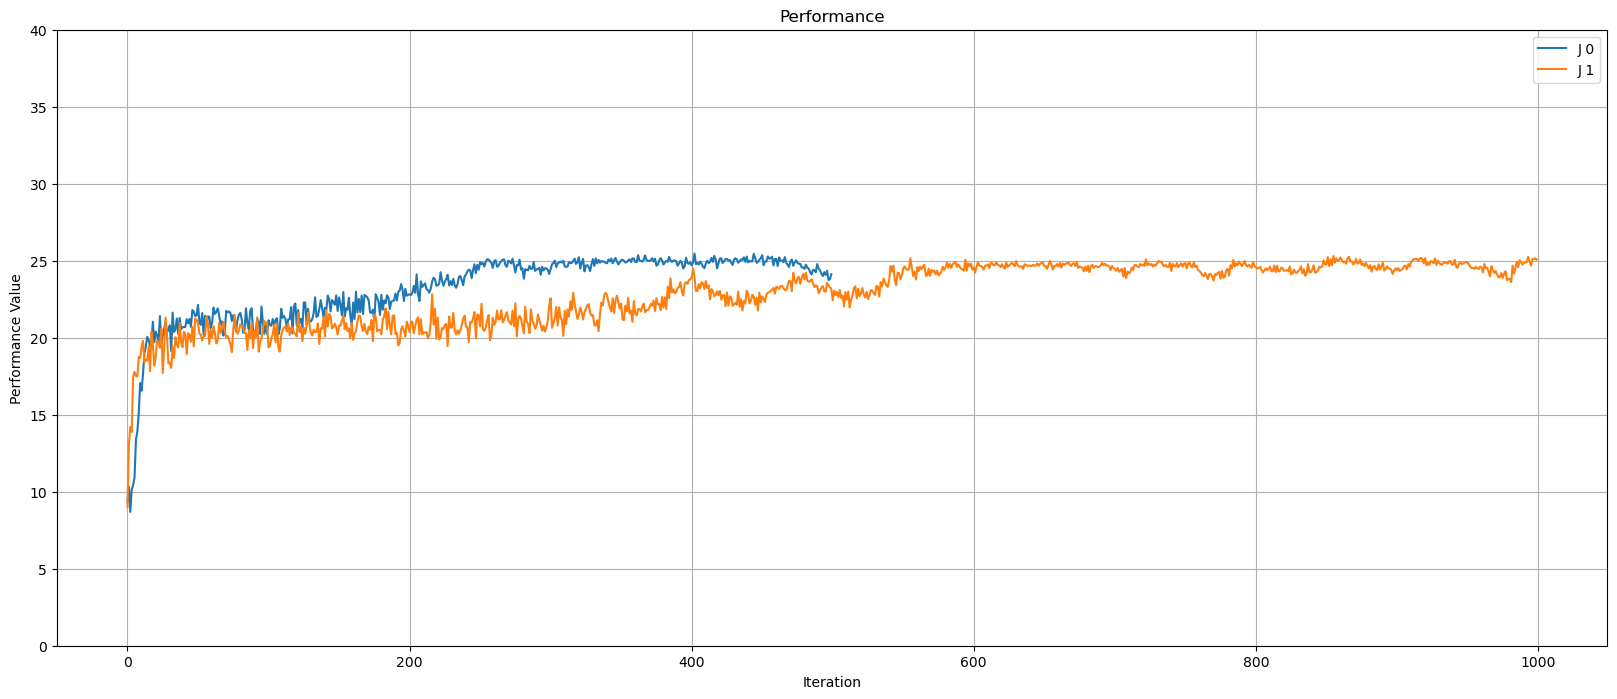

In [40]:

plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.ylim(0, 40)
plt.show()

<Figure size 640x480 with 0 Axes>

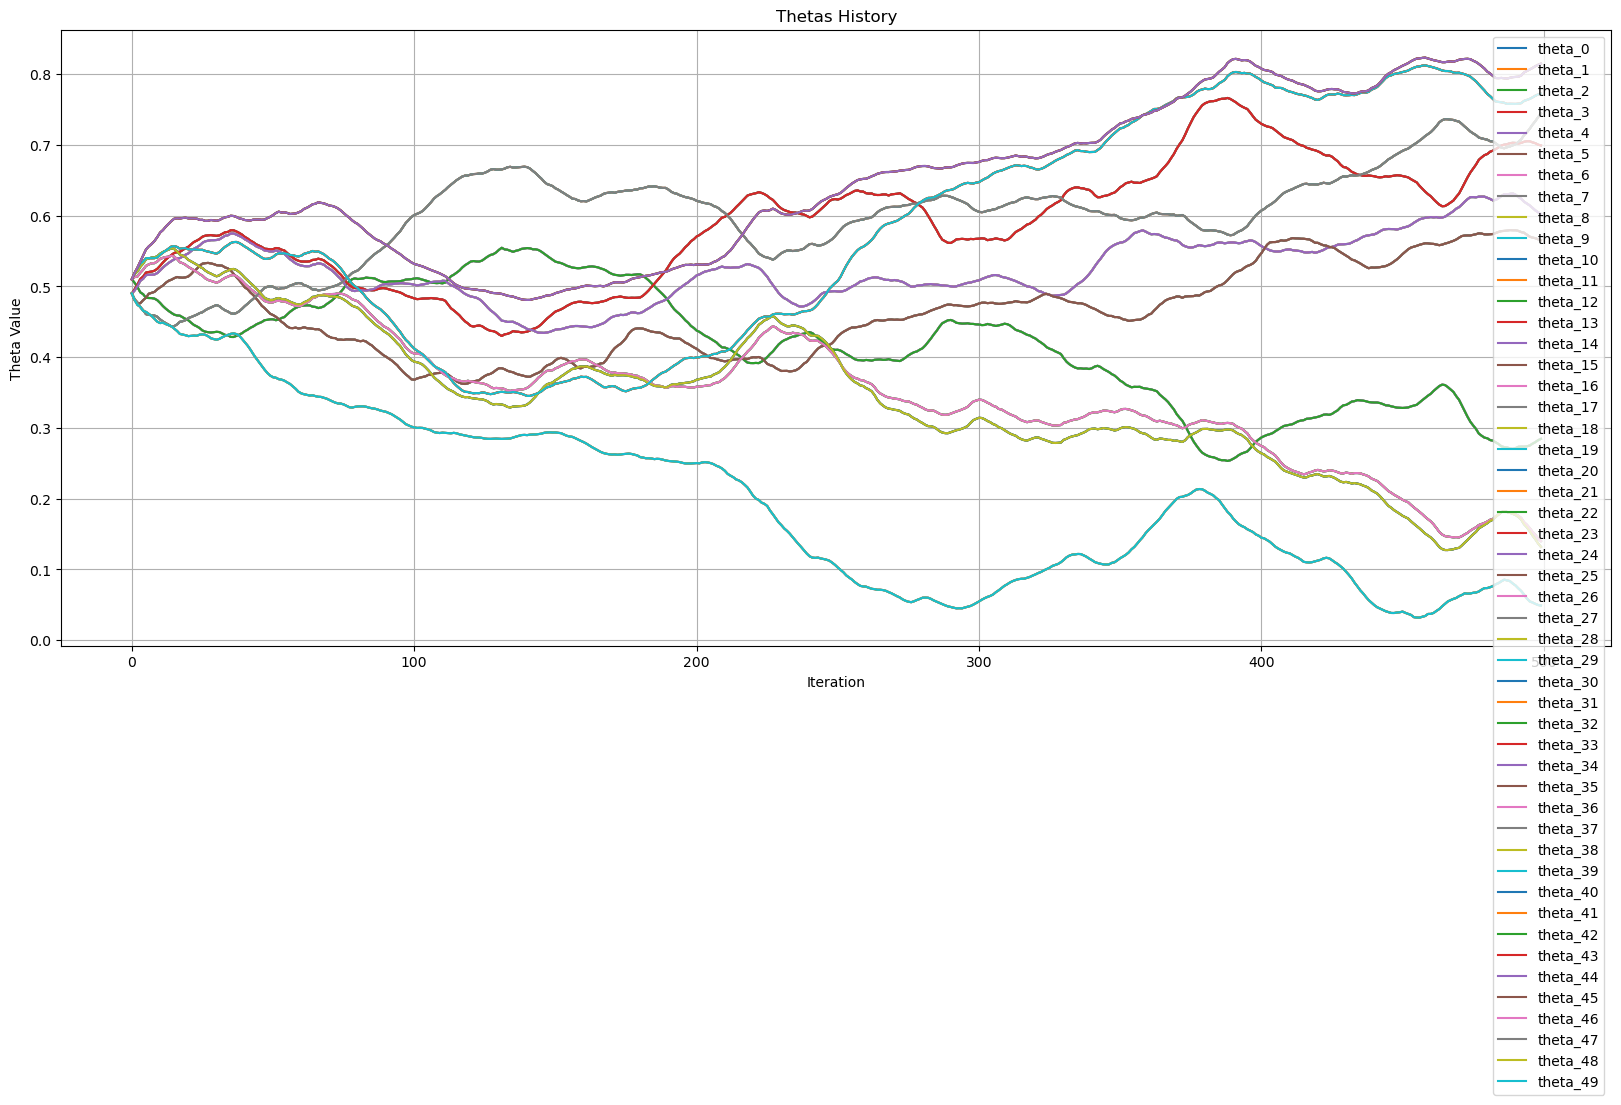

In [26]:
# theta plot
idx = 0
ite = len(data[idx]["performance"])
x = np.arange(ite)
dim = len(data[idx]["thetas_history"][0])
best_idx = np.where(np.array(data[idx]["performance"]) == data[idx]["best_perf"])[0]
best_theta_idx = []
for i in range(dim):
    best_theta_idx.append(np.where(np.array(data[idx]["thetas_history"])[:, i] == data[idx]["best_theta"][i]))
best_theta_idx = np.ravel(np.array(best_theta_idx))


plt.clf()
plt.figure(figsize=(20, 8))
for i in range(dim):
    plt.plot(x, np.array(data[idx]["thetas_history"])[:, i], label=f"theta_{i}")
plt.title("Thetas History")
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.legend(loc="best")
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

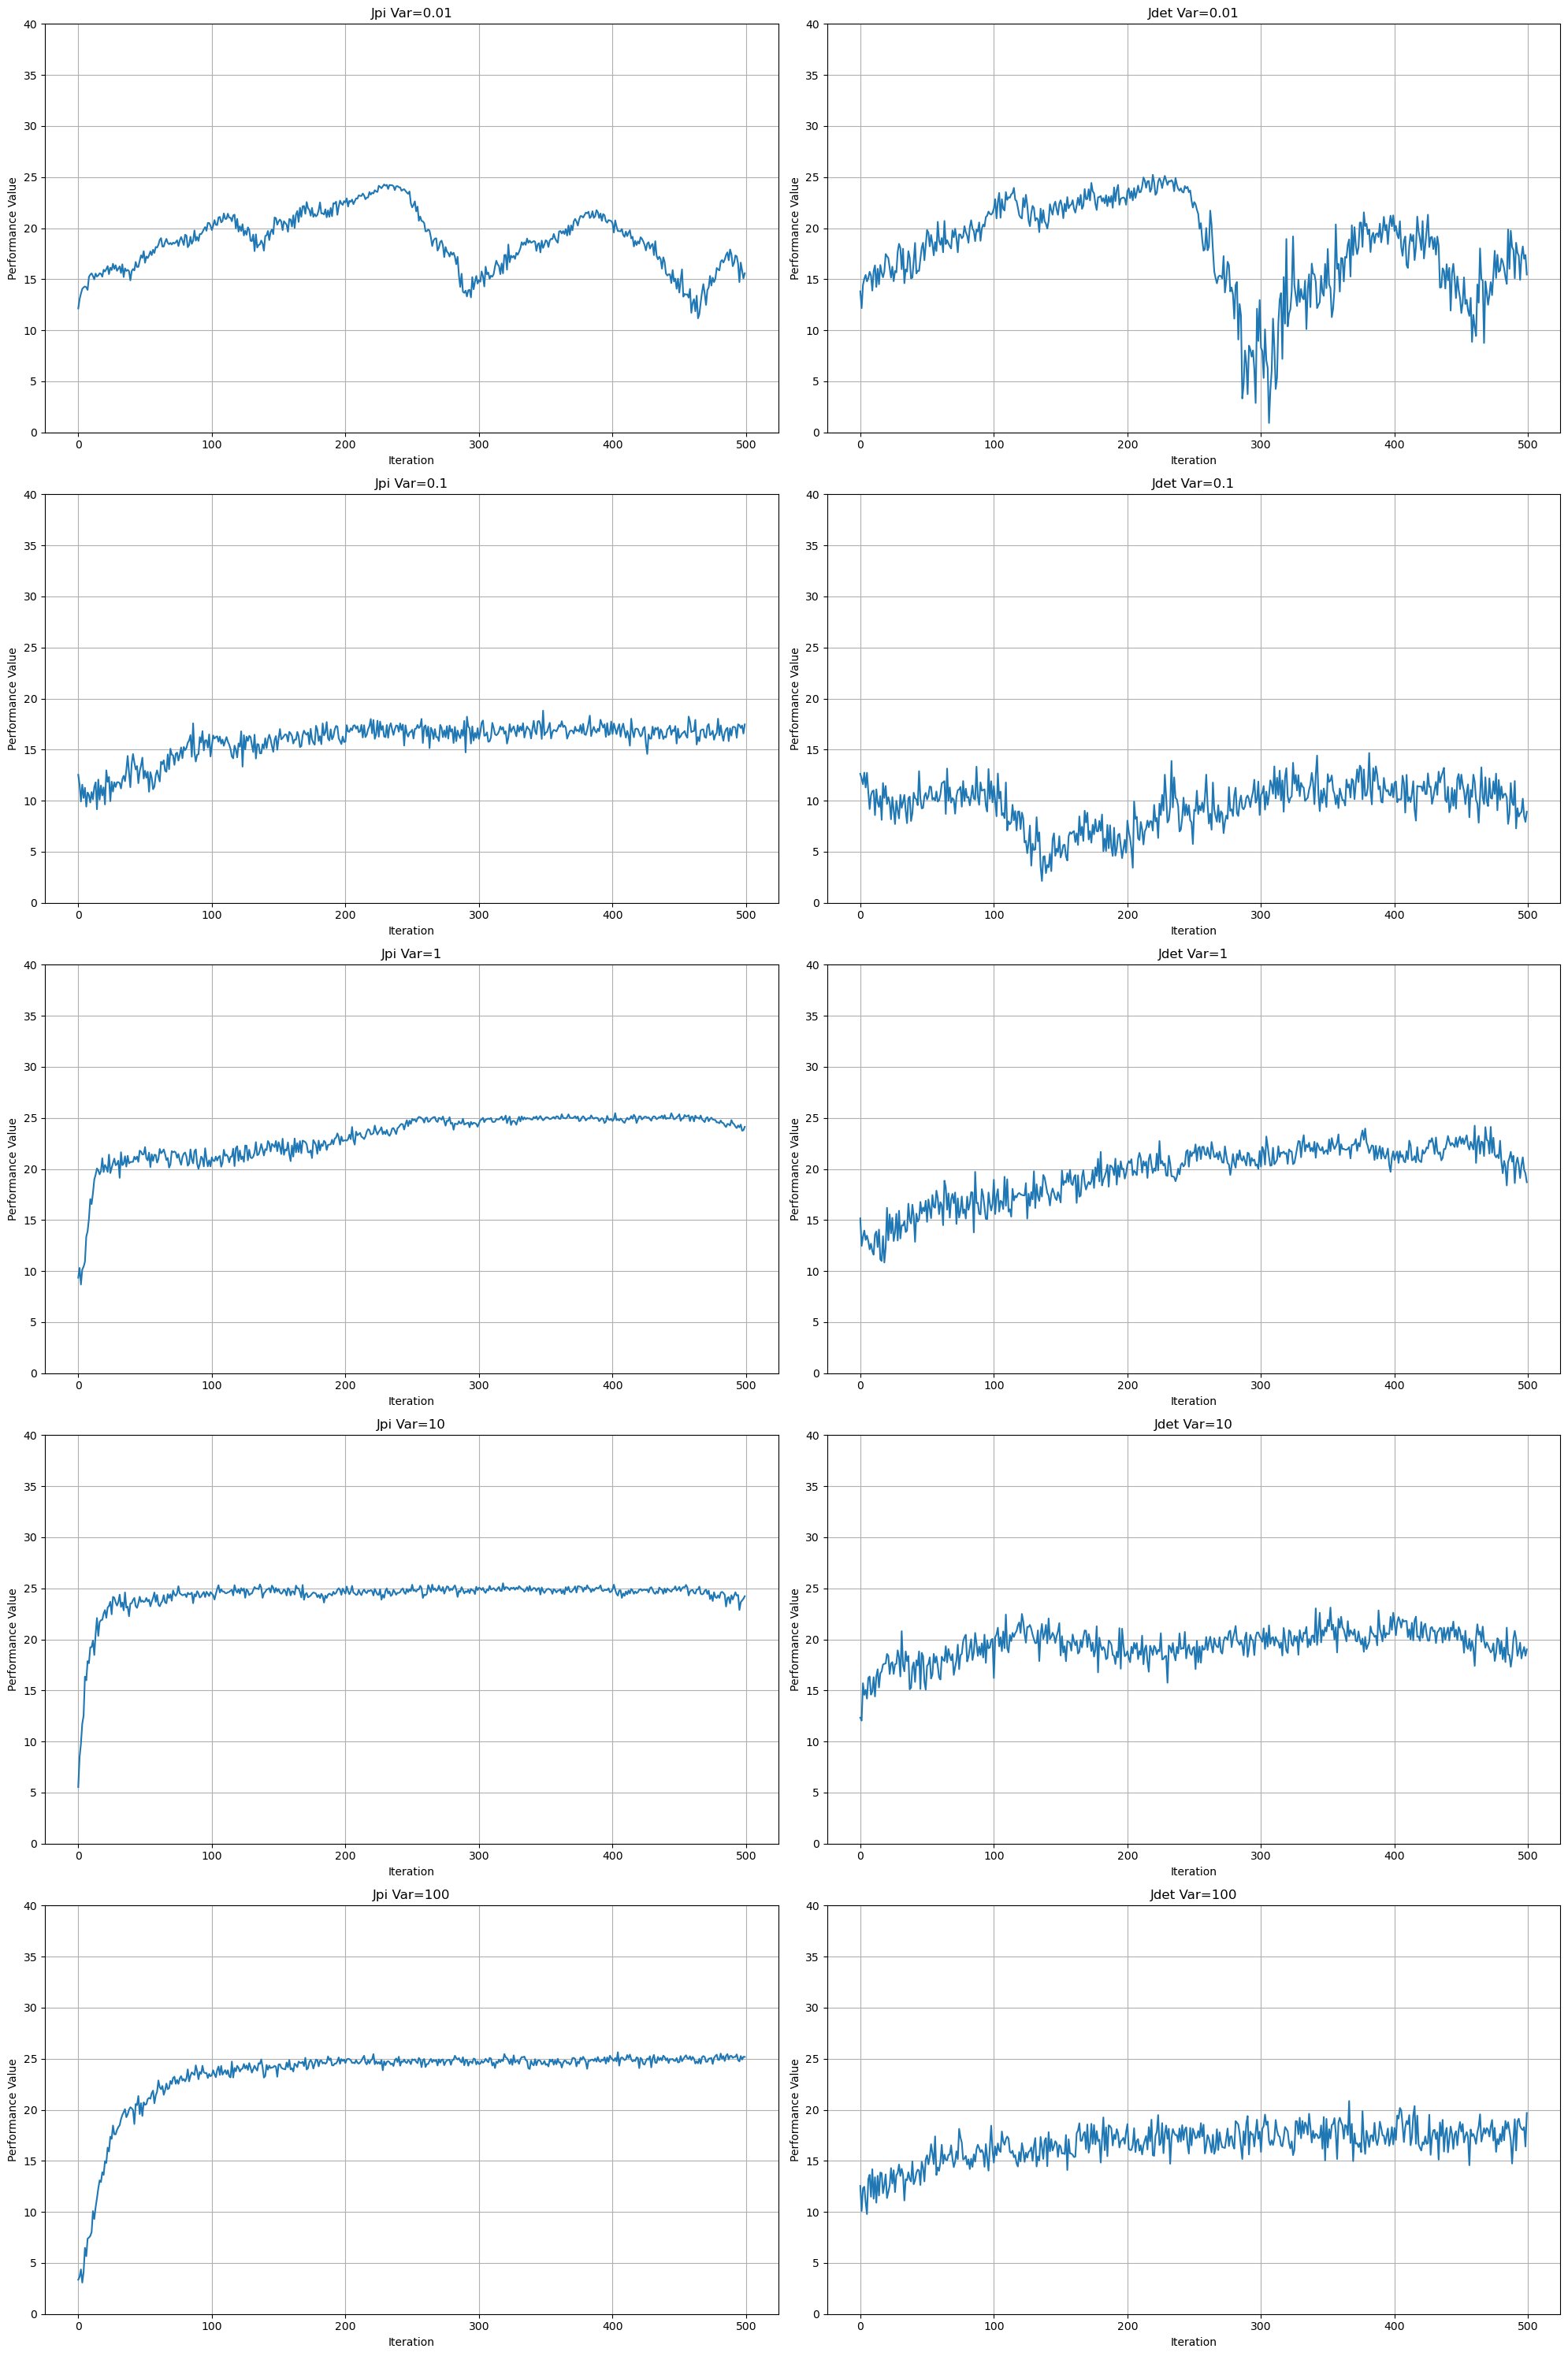

In [27]:
plt.clf()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
x = np.arange(500)
curves = []
labels = []
for i, d in enumerate(data):
    curves.append(np.array(d["performance"]))
    curves.append(np.array(d["performance_det"]))
    labels.append("Jpi " + lab[i])
    labels.append("Jdet " + lab[i])
    
for i, ax in enumerate(axs.flat):
    ax.plot(x, curves[i])
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Performance Value")
    ax.set_title(labels[i])
    ax.set_ylim(0,40)
    ax.grid()
plt.tight_layout()
plt.show()